https://www.kaggle.com/arthurtok/exploratory-data-analysis-visualisation

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [16]:
df_crime = pd.read_csv('Crime1.csv')

In [17]:
df_crime.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Which are the most common categories of crime committed?

In [18]:
df_crime.Category.value_counts()

LARCENY/THEFT                  223
NON-CRIMINAL                   102
OTHER OFFENSES                  98
ASSAULT                         60
VEHICLE THEFT                   54
VANDALISM                       40
BURGLARY                        39
SUSPICIOUS OCC                  35
MISSING PERSON                  27
WARRANTS                        26
DRUG/NARCOTIC                   15
FRAUD                           14
SECONDARY CODES                 14
ROBBERY                         14
PROSTITUTION                    13
WEAPON LAWS                     11
TRESPASS                        11
SEX OFFENSES FORCIBLE           10
DRUNKENNESS                      6
DRIVING UNDER THE INFLUENCE      5
KIDNAPPING                       4
STOLEN PROPERTY                  3
ARSON                            3
FORGERY/COUNTERFEITING           2
LIQUOR LAWS                      2
DISORDERLY CONDUCT               2
EMBEZZLEMENT                     1
BRIBERY                          1
Name: Category, dtyp

In [19]:
# Create a dataframe containing the Category counts
category = pd.DataFrame(list(zip(df_crime.Category.value_counts().index,df_crime.Category.value_counts())), columns=['Category','value'], index=None)

In [20]:
category.head(5)

,Category,value
0,LARCENY/THEFT,223
1,NON-CRIMINAL,102
2,OTHER OFFENSES,98
3,ASSAULT,60
4,VEHICLE THEFT,54


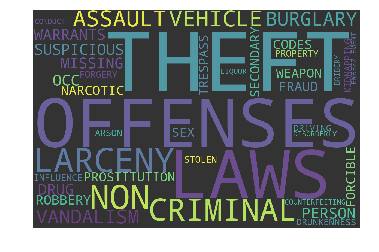

In [21]:


# Generating the wordcloud with the values under the category dataframe
catcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1200,
                          height=800
                         ).generate(" ".join(category['Category'].values))



plt.imshow(catcloud, alpha=0.8)
plt.axis('off')
plt.show()

Text(0.5,1,'Factorplot of the category of crime and number of occurences ')

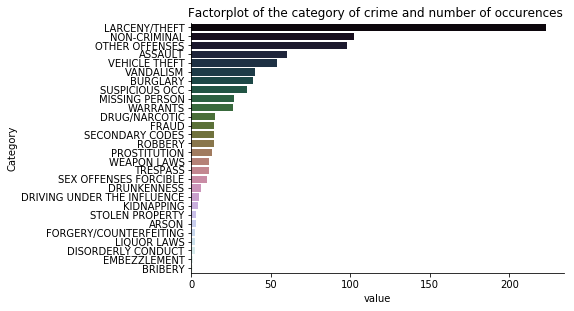

In [22]:
# Generating the factorplot
sns.factorplot(x='value', y = 'Category', data=category,kind="bar", size=4.25, aspect=1.9, palette="cubehelix")
plt.title('Factorplot of the category of crime and number of occurences ')

In [23]:
df_crime.Descript.value_counts()

GRAND THEFT FROM LOCKED AUTO                       76
AIDED CASE, MENTAL DISTURBED                       30
STOLEN AUTOMOBILE                                  30
PETTY THEFT OF PROPERTY                            30
BATTERY                                            22
LOST PROPERTY                                      20
GRAND THEFT FROM UNLOCKED AUTO                     20
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES          19
DRIVERS LICENSE, SUSPENDED OR REVOKED              18
INVESTIGATIVE DETENTION                            16
PETTY THEFT FROM LOCKED AUTO                       16
AIDED CASE                                         16
SUSPICIOUS OCCURRENCE                              15
WARRANT ARREST                                     15
MALICIOUS MISCHIEF, VANDALISM                      15
STOLEN TRUCK                                       14
GRAND THEFT OF PROPERTY                            13
FOUND PROPERTY                                     13
FOUND PERSON                

Day on which there is most crime?

In [25]:
DOW = pd.DataFrame(list(zip(df_crime.DayOfWeek.value_counts(),df_crime.DayOfWeek.value_counts().index)), columns=['count','Day'], index=None)

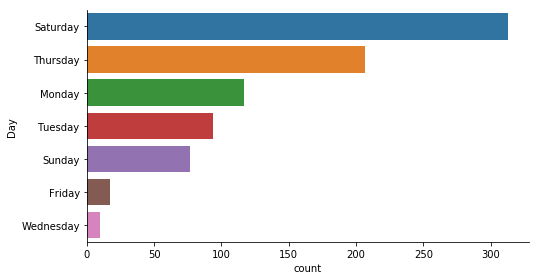

In [26]:
sns.factorplot(x="count", y="Day", data = DOW, kind="bar", size=4, aspect=1.9)

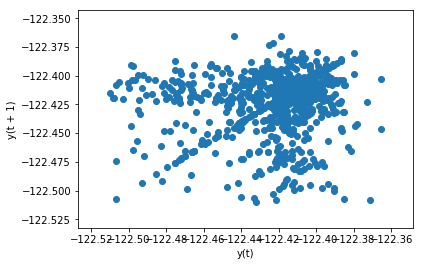

In [27]:
# Importing the lag_plot plotting function
from pandas.tools.plotting import lag_plot
# Lag_plot for X coordinate
plt.figure()
lag_plot(df_crime.X)